In [1]:
# Import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Load dataset
transaction_cleaned = pd.read_csv('transaction_cleaned.csv')

In [3]:
# Identify non-numeric columns
non_numeric_cols = transaction_cleaned.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index([], dtype='object')


In [4]:
transaction_cleaned.dtypes

TransactionID                   int64
id_01                         float64
id_02                         float64
id_05                         float64
id_06                         float64
                               ...   
R_emaildomain_yahoo.com.mx       bool
R_emaildomain_yahoo.de           bool
R_emaildomain_yahoo.es           bool
R_emaildomain_yahoo.fr           bool
R_emaildomain_ymail.com          bool
Length: 508, dtype: object

In [5]:
# checking what columns there are
columns = transaction_cleaned.columns.tolist()
print(columns)

['TransactionID', 'id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_17', 'id_19', 'id_20', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V

In [6]:
# wrapping the columns for display
pd.set_option('display.max_columns', None)
print(transaction_cleaned)

       TransactionID  id_01     id_02  id_05  id_06  id_11  id_17  id_19  \
0            2987004    0.0   70787.0    NaN    NaN  100.0  166.0  542.0   
1            2987008   -5.0   98945.0    0.0   -5.0  100.0  166.0  621.0   
2            2987010   -5.0  191631.0    0.0    0.0  100.0  121.0  410.0   
3            2987011   -5.0  221832.0    0.0   -6.0  100.0  225.0  176.0   
4            2987016    0.0    7460.0    1.0    0.0  100.0  166.0  529.0   
...              ...    ...       ...    ...    ...    ...    ...    ...   
29995        3065904   -5.0  115546.0    0.0   -3.0  100.0  166.0  352.0   
29996        3065905    0.0   12458.0    0.0    0.0  100.0  166.0  312.0   
29997        3065908    0.0   19909.0    0.0    0.0  100.0  166.0  312.0   
29998        3065910    0.0  108063.0   23.0  -13.0  100.0  166.0  263.0   
29999        3065912  -55.0   68163.0    2.0   -5.0  100.0  166.0  216.0   

       id_20  isFraud  TransactionDT  TransactionAmt  card1  card2  card3  \
0      144

In [7]:
# Create Exploratory Data Analysis

In [8]:
# EDA 1 - Missing Values Analysis
missing_percentage = transaction_cleaned.isnull().mean() * 100
plt.figure(figsize=(120, 90))
sns.barplot(x=missing_percentage.index, y=missing_percentage)
plt.xticks(rotation=90)
plt.title('Missing Values Percentage by Column')
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Column Names')
plt.show()
missing_percentage

TransactionID                 0.000000
id_01                         0.000000
id_02                         2.406667
id_05                         5.333333
id_06                         5.333333
                                ...   
R_emaildomain_yahoo.com.mx    0.000000
R_emaildomain_yahoo.de        0.000000
R_emaildomain_yahoo.es        0.000000
R_emaildomain_yahoo.fr        0.000000
R_emaildomain_ymail.com       0.000000
Length: 508, dtype: float64

In [9]:
# Sort by percentage of missing values
sorted_df_desc = missing_percentage.sort_values(ascending=False)
sorted_df_desc

V258                             7.296667
V248                             7.296667
V246                             7.296667
V244                             7.296667
V243                             7.296667
                                   ...   
id_31_chrome 56.0                0.000000
id_31_chrome 55.0 for android    0.000000
id_31_chrome 55.0                0.000000
id_31_chrome 54.0 for android    0.000000
R_emaildomain_ymail.com          0.000000
Length: 508, dtype: float64

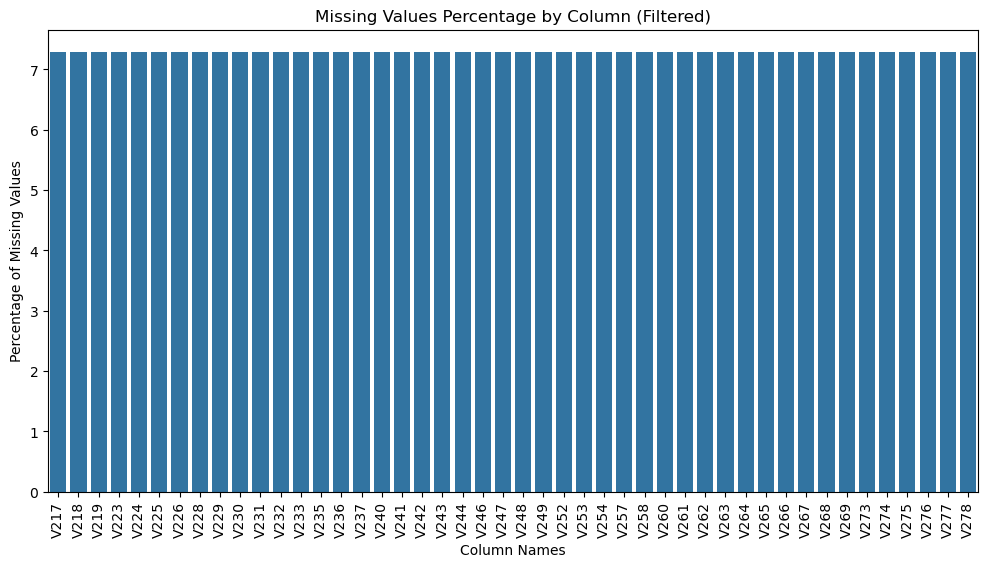

In [10]:
# Filter columns with missing percentage greater than 7
missing_percentage_filtered = missing_percentage[missing_percentage > 7]

# Plot the filtered missing percentages
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage_filtered.index, y=missing_percentage_filtered)
plt.xticks(rotation=90)
plt.title('Missing Values Percentage by Column (Filtered)')
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Column Names')
plt.show()


In [11]:
# Identify columns to drop
columns_to_drop = missing_percentage_filtered.index
columns_to_drop


Index(['V217', 'V218', 'V219', 'V223', 'V224', 'V225', 'V226', 'V228', 'V229',
       'V230', 'V231', 'V232', 'V233', 'V235', 'V236', 'V237', 'V240', 'V241',
       'V242', 'V243', 'V244', 'V246', 'V247', 'V248', 'V249', 'V252', 'V253',
       'V254', 'V257', 'V258', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265',
       'V266', 'V267', 'V268', 'V269', 'V273', 'V274', 'V275', 'V276', 'V277',
       'V278'],
      dtype='object')

In [12]:
# Drop columns with more than 7% missing values
transaction_cleaned = transaction_cleaned.drop(columns=columns_to_drop)
transaction_cleaned

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_17,id_19,id_20,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V220,V221,V222,V227,V234,V238,V239,V245,V250,V251,V255,V256,V259,V270,V271,V272,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_12_Found,id_12_NotFound,id_15_Found,id_15_New,id_15_Unknown,id_28_Found,id_28_New,id_29_Found,id_29_NotFound,id_31_BLU/Dash,id_31_Cherry,id_31_Generic/Android,id_31_Generic/Android 7.0,id_31_Inco/Minion,id_31_LG/K-200,id_31_Lanix/Ilium,id_31_M4Tel/M4,id_31_Microsoft/Windows,id_31_Mozilla/Firefox,id_31_Nokia/Lumia,id_31_Samsung/SCH,id_31_Samsung/SM-G531H,id_31_Samsung/SM-G532M,id_31_ZTE/Blade,id_31_android,id_31_android browser 4.0,id_31_android webview 4.0,id_31_aol,id_31_chrome,id_31_chrome 43.0 for android,id_31_chrome 46.0 for android,id_31_chrome 49.0,id_31_chrome 49.0 for android,id_31_chrome 50.0 for android,id_31_chrome 51.0,id_31_chrome 51.0 for android,id_31_chrome 52.0 for android,id_31_chrome 53.0 for android,id_31_chrome 54.0 for android,id_31_chrome 55.0,id_31_chrome 55.0 for android,id_31_chrome 56.0,id_31_chrome 56.0 for android,id_31_chrome 57.0,id_31_chrome 57.0 for android,id_31_chrome 58.0,id_31_chrome 58.0 for android,id_31_chrome 59.0,id_31_chrome 59.0 for android,id_31_chrome 60.0,id_31_chrome 60.0 for android,id_31_chrome 61.0,id_31_chrome 61.0 for android,id_31_chrome 62.0,id_31_chrome 62.0 for android,id_31_chrome 62.0 for ios,id_31_chrome 63.0,id_31_chrome 63.0 for android,id_31_chrome 63.0 for ios,id_31_chrome 64.0,id_31_chrome 64.0 for android,id_31_chrome 64.0 for ios,id_31_chrome 65.0,id_31_chrome 65.0 for android,id_31_chrome 65.0 for ios,id_31_chrome 66.0,id_31_chrome 66.0 for android,id_31_chrome 66.0 for ios,id_31_chrome 67.0,id_31_chrome 67.0 for android,id_31_chrome 69.0,id_31_chrome generic,id_31_chrome generic for android,id_31_chromium,id_31_comodo,id_31_cyberfox,id_31_edge,id_31_edge 13.0,id_31_edge 14.0,id_31_edge 15.0,id_31_edge 16.0,id_31_edge 17.0,id_31_facebook,id_31_firefox,id_31_firefox 47.0,id_31_firefox 48.0,id_31_firefox 52.0,id_31_firefox 55.0,id_31_firefox 56.0,id_31_firefox 57.0,id_31_firefox 58.0,id_31_firefox 59.0,id_31_firefox 60.0,id_31_firefox generic,id_31_firefox mobile 61.0,id_31_google,id_31_google search application 48.0,id_31_google search application 49.0,id_31_icedragon,id_31_ie,id_31_ie 11.0 for desktop,id_31_ie 11.0 for tablet,id_31_iron,id_31_line,id_31_maxthon,id_31_mobile,id_31_mobile safari 10.0,id_31_mobile safari 11.0,id_31_mobile safari 8.0,id_31_mobile safari 9.0,id_31_mobile safari generic,id_31_mobile safari uiwebview,id_31_opera,id_31_opera 49.0,id_31_opera 51.0,id_31_opera 52.0,id_31_opera 53.0,id_31_opera generic,id_31_other,id_31_palemoon,id_31_puffin,id_31_safari,id_31_safari 10.0,id_31_safari 11.0,id_31_safari 9.0,id_31_safari generic,id_31_samsung,id_31_samsung browser 3.3,id_31_samsung browser 4.0,id_31_samsung browser 4.2,id_31_samsung browser 5.2,id_31_samsung browser 5.4,id_31_samsung browser 6.2,id_31_samsung browser 6.4,id_31_samsung browser 7.0,id_31_samsung browser generic,id_31_seamonkey,id_31_silk,id_31_waterfox,id_35_F,id_35_T,id_36_F,id_36_T,id_37_F,id_37_T,id_38_F,id_38_T,DeviceType_desktop,DeviceType_mobile,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,card4_american express,card4_discover,card4_mastercard,card4_v

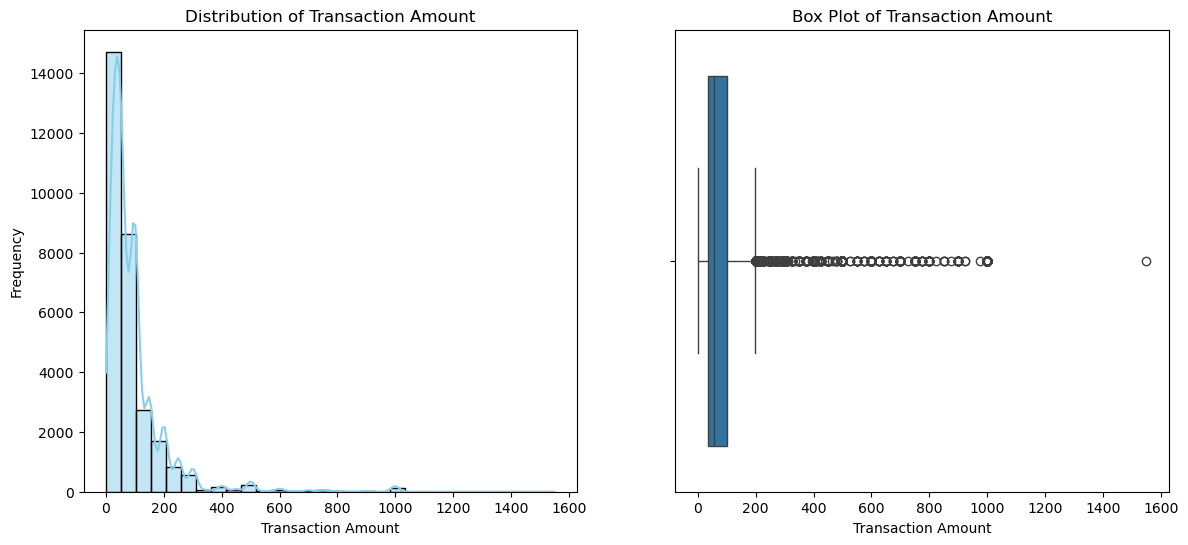

In [13]:
# EDA 2 - Numerical Data Analysis
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(transaction_cleaned['TransactionAmt'], bins=30, color='skyblue', kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=transaction_cleaned['TransactionAmt'])
plt.title('Box Plot of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.show()

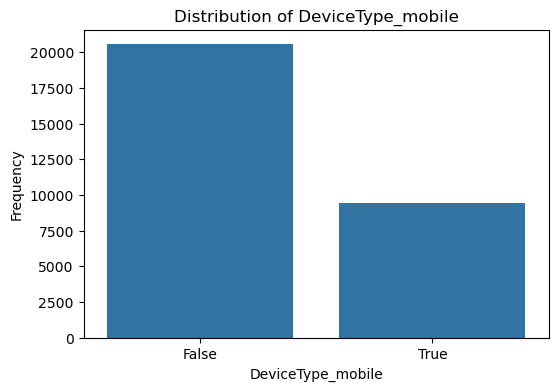

In [14]:
# EDA 3 - Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='DeviceType_mobile', data=transaction_cleaned)
plt.title('Distribution of DeviceType_mobile')
plt.xlabel('DeviceType_mobile')
plt.ylabel('Frequency')
plt.show()

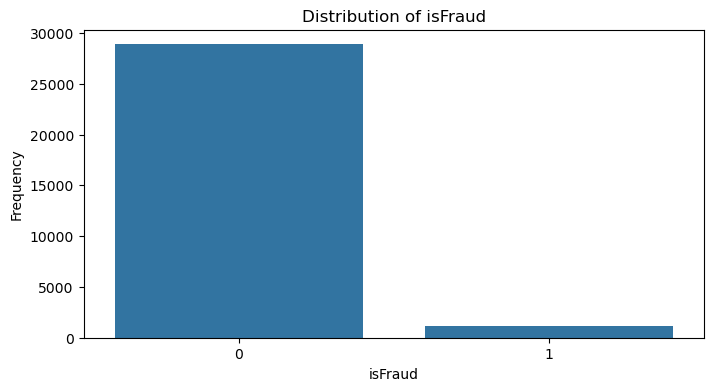

In [15]:
# EDA 4 - Categorical Data Analysis
def plot_categorical_distribution(column):
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, data=transaction_cleaned)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

plot_categorical_distribution('isFraud')

In [16]:
transaction_cleaned

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_17,id_19,id_20,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V220,V221,V222,V227,V234,V238,V239,V245,V250,V251,V255,V256,V259,V270,V271,V272,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_12_Found,id_12_NotFound,id_15_Found,id_15_New,id_15_Unknown,id_28_Found,id_28_New,id_29_Found,id_29_NotFound,id_31_BLU/Dash,id_31_Cherry,id_31_Generic/Android,id_31_Generic/Android 7.0,id_31_Inco/Minion,id_31_LG/K-200,id_31_Lanix/Ilium,id_31_M4Tel/M4,id_31_Microsoft/Windows,id_31_Mozilla/Firefox,id_31_Nokia/Lumia,id_31_Samsung/SCH,id_31_Samsung/SM-G531H,id_31_Samsung/SM-G532M,id_31_ZTE/Blade,id_31_android,id_31_android browser 4.0,id_31_android webview 4.0,id_31_aol,id_31_chrome,id_31_chrome 43.0 for android,id_31_chrome 46.0 for android,id_31_chrome 49.0,id_31_chrome 49.0 for android,id_31_chrome 50.0 for android,id_31_chrome 51.0,id_31_chrome 51.0 for android,id_31_chrome 52.0 for android,id_31_chrome 53.0 for android,id_31_chrome 54.0 for android,id_31_chrome 55.0,id_31_chrome 55.0 for android,id_31_chrome 56.0,id_31_chrome 56.0 for android,id_31_chrome 57.0,id_31_chrome 57.0 for android,id_31_chrome 58.0,id_31_chrome 58.0 for android,id_31_chrome 59.0,id_31_chrome 59.0 for android,id_31_chrome 60.0,id_31_chrome 60.0 for android,id_31_chrome 61.0,id_31_chrome 61.0 for android,id_31_chrome 62.0,id_31_chrome 62.0 for android,id_31_chrome 62.0 for ios,id_31_chrome 63.0,id_31_chrome 63.0 for android,id_31_chrome 63.0 for ios,id_31_chrome 64.0,id_31_chrome 64.0 for android,id_31_chrome 64.0 for ios,id_31_chrome 65.0,id_31_chrome 65.0 for android,id_31_chrome 65.0 for ios,id_31_chrome 66.0,id_31_chrome 66.0 for android,id_31_chrome 66.0 for ios,id_31_chrome 67.0,id_31_chrome 67.0 for android,id_31_chrome 69.0,id_31_chrome generic,id_31_chrome generic for android,id_31_chromium,id_31_comodo,id_31_cyberfox,id_31_edge,id_31_edge 13.0,id_31_edge 14.0,id_31_edge 15.0,id_31_edge 16.0,id_31_edge 17.0,id_31_facebook,id_31_firefox,id_31_firefox 47.0,id_31_firefox 48.0,id_31_firefox 52.0,id_31_firefox 55.0,id_31_firefox 56.0,id_31_firefox 57.0,id_31_firefox 58.0,id_31_firefox 59.0,id_31_firefox 60.0,id_31_firefox generic,id_31_firefox mobile 61.0,id_31_google,id_31_google search application 48.0,id_31_google search application 49.0,id_31_icedragon,id_31_ie,id_31_ie 11.0 for desktop,id_31_ie 11.0 for tablet,id_31_iron,id_31_line,id_31_maxthon,id_31_mobile,id_31_mobile safari 10.0,id_31_mobile safari 11.0,id_31_mobile safari 8.0,id_31_mobile safari 9.0,id_31_mobile safari generic,id_31_mobile safari uiwebview,id_31_opera,id_31_opera 49.0,id_31_opera 51.0,id_31_opera 52.0,id_31_opera 53.0,id_31_opera generic,id_31_other,id_31_palemoon,id_31_puffin,id_31_safari,id_31_safari 10.0,id_31_safari 11.0,id_31_safari 9.0,id_31_safari generic,id_31_samsung,id_31_samsung browser 3.3,id_31_samsung browser 4.0,id_31_samsung browser 4.2,id_31_samsung browser 5.2,id_31_samsung browser 5.4,id_31_samsung browser 6.2,id_31_samsung browser 6.4,id_31_samsung browser 7.0,id_31_samsung browser generic,id_31_seamonkey,id_31_silk,id_31_waterfox,id_35_F,id_35_T,id_36_F,id_36_T,id_37_F,id_37_T,id_38_F,id_38_T,DeviceType_desktop,DeviceType_mobile,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,card4_american express,card4_discover,card4_mastercard,card4_v

In [17]:
# EDA 5 - Correlation Analysis
corr_matrix = transaction_cleaned.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()